# Demonstration of k-means assumptions

In [12]:
# Importar las librerias
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
# Generacion de los datos
n_samples = 1500 # Numero de muestras
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] # Matris de transformacion
X, y = make_blobs(n_samples=n_samples, random_state=random_state) # Generar blobs gaussianos con las etiquetas de los datos y sus caracteristicas
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Varianza desigual
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Generar los blobs de tamaños desiguales
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

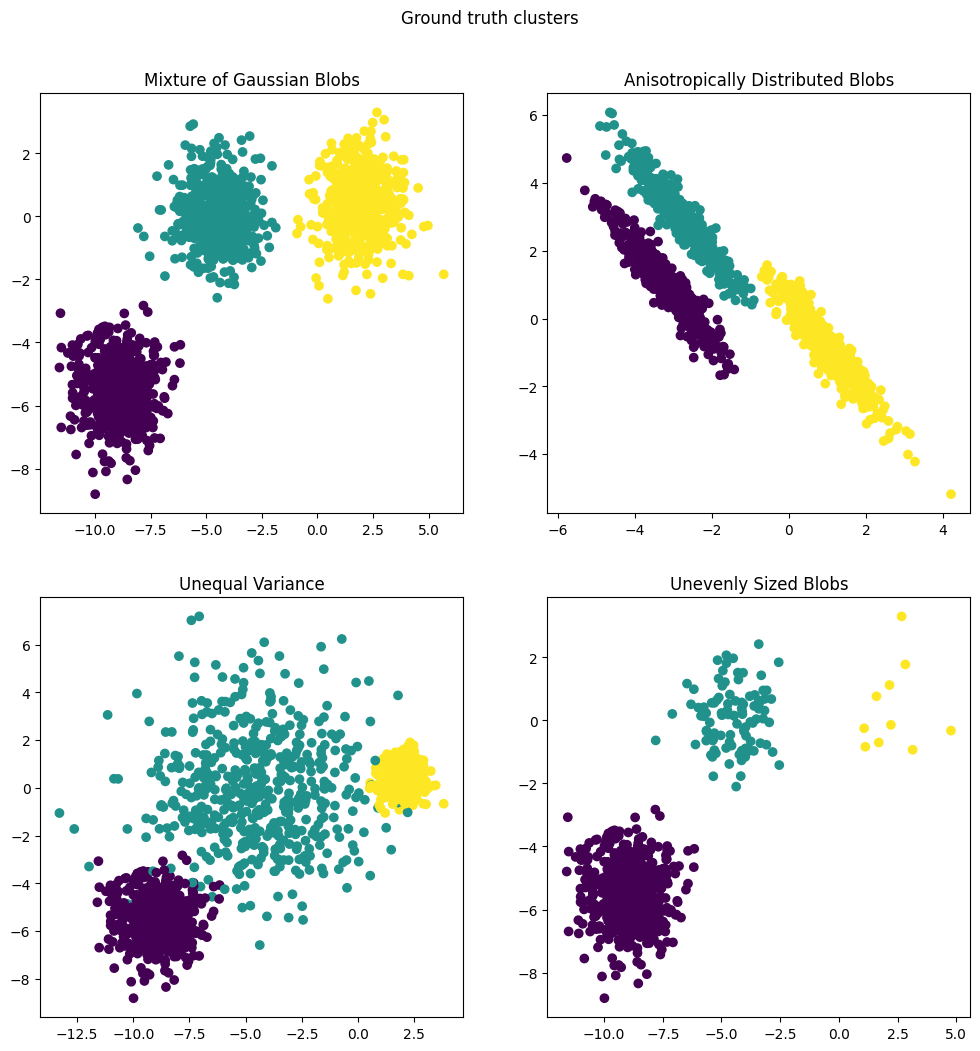

In [15]:
# Visualizar los datos generados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

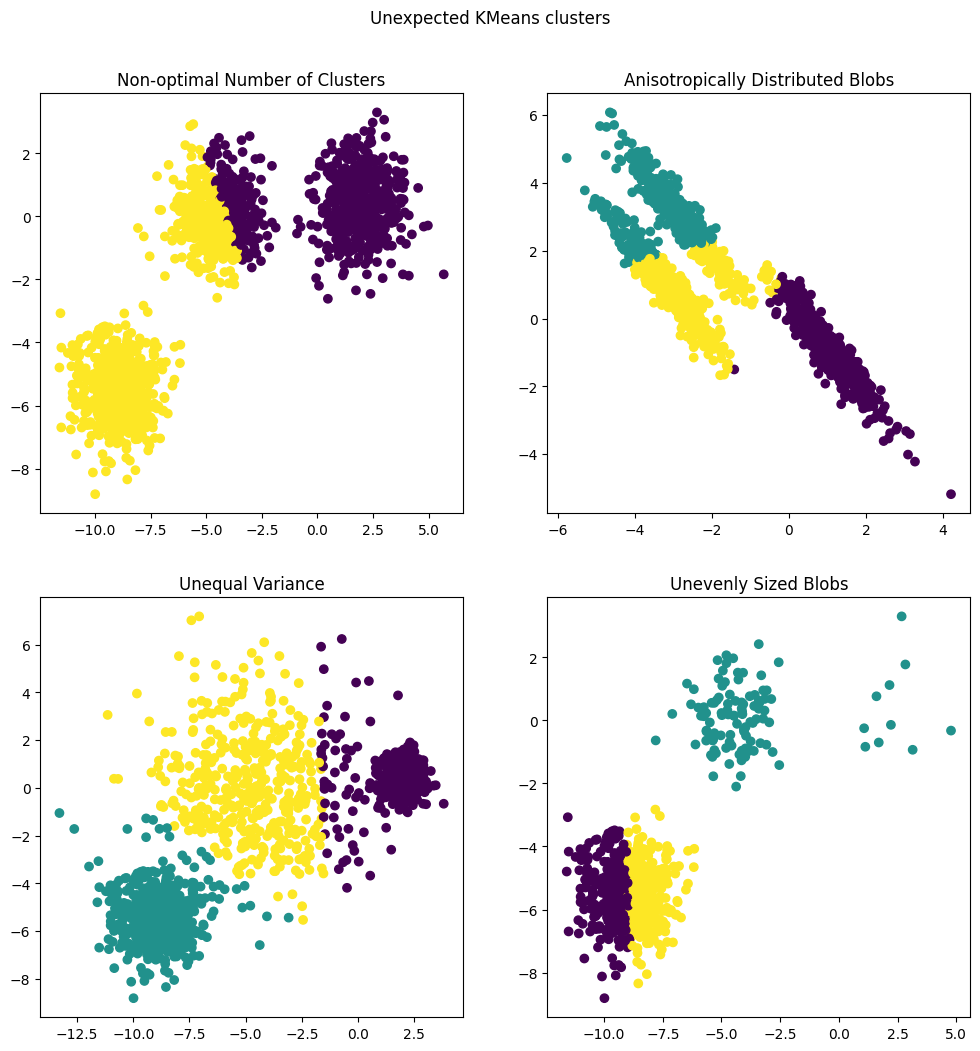

In [16]:
# Realizar el clustering con K-Means
common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Conjunto de numero no optimo de clusters
y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X) # Aplicar K-Means y visualizarlo
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

# Conjunto de datos anisotrópicos
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso) # Aplicar K-Means y visualizarlo
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

# Conjunto con variazan desigual
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied) # Aplicar K-Means y visualizarlo
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

# Conjunto con blobs de tamaños desiguales
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered) # Aplicar K-Means y visualizarlo
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

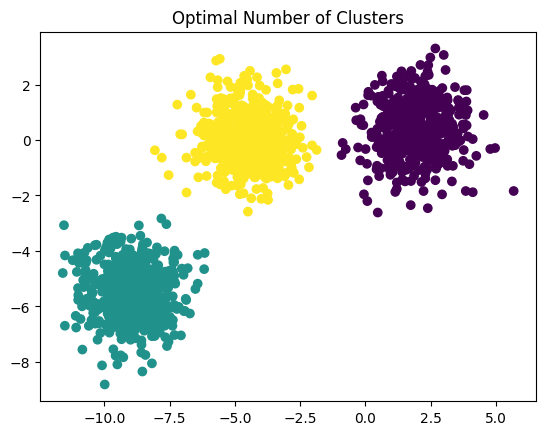

In [19]:
# Aplicar K-Means con un numero optimo de clusters 
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

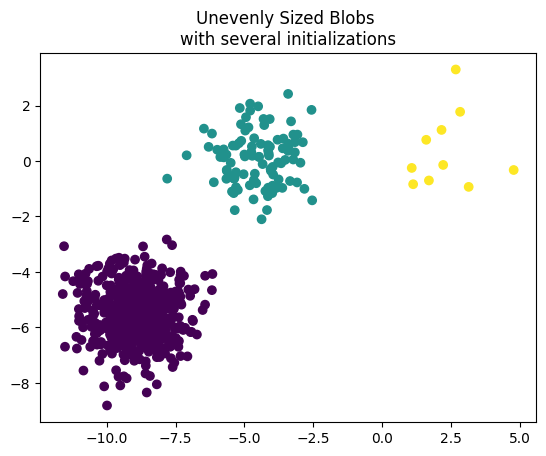

In [20]:
# Aplicar K-Means con varias inicializaciones
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

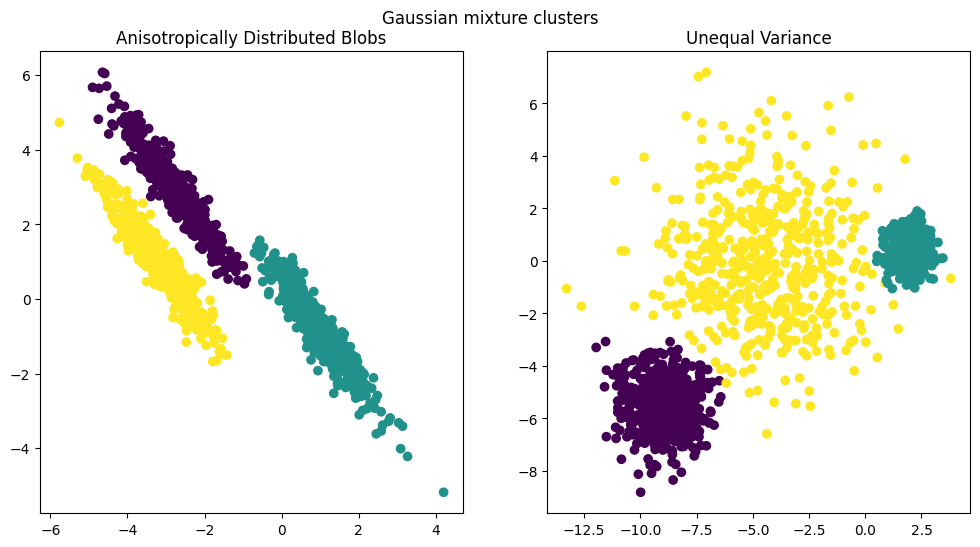

In [21]:
# Aplicar K-Means con el modelo GaussianMixture
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()